In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
# setup numbers
torch.manual_seed(69)
weight = 12
bias = 14
x = torch.arange(0, 1, .01)
y = weight * x + bias
# split into training, test splits
xTrain = x[:80]
yTrain = y[:80]
xTest = x[80:]
yTest = y[80:]




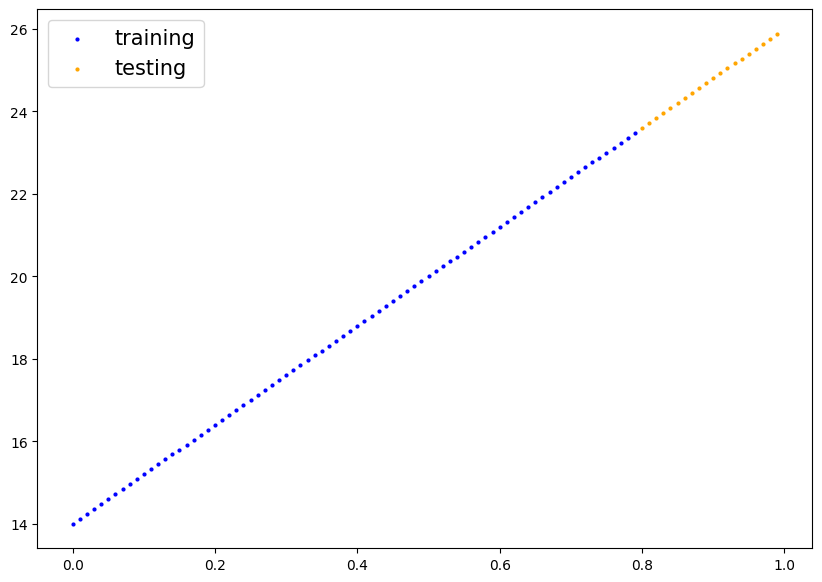

In [2]:
# plot results function
def plotPoints(trainData, trainLabels, testData, testLabels, predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(trainData, trainLabels, s=4, c="blue", label = "training")
    plt.scatter(testData, testLabels, s=4, c="orange", label = "testing")
    if predictions != None:
        plt.scatter(testData, predictions, s=4, c="green", label = "preds")
    plt.legend(prop={"size":15})
plotPoints(xTrain, yTrain, xTest, yTest)

In [3]:
# Creation of model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(1,requires_grad=False))
        self.bias = nn.Parameter(torch.rand(1, requires_grad=False))
    def forward(self, x: torch.Tensor):
        return(self.weight * x + self.bias)

# Initialize model
torch.manual_seed(69)
model0 = LinearRegressionModel()


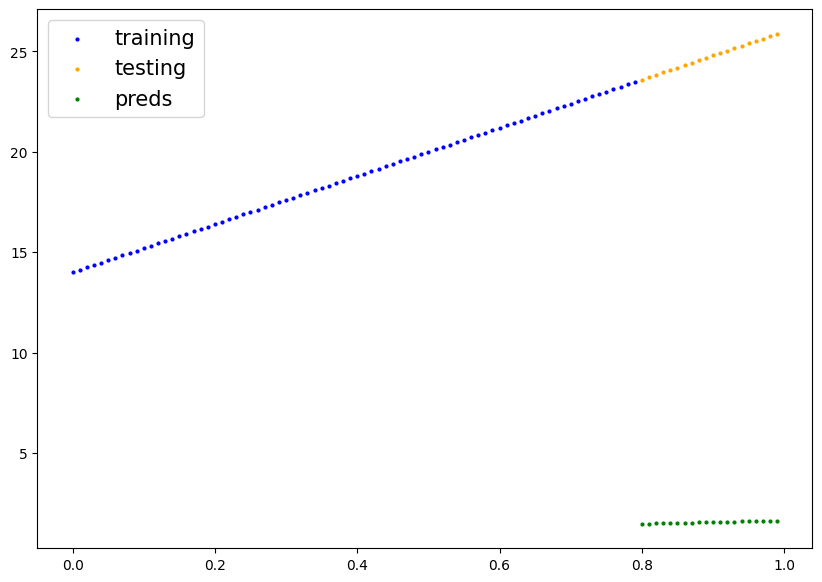

In [4]:
# test adding predictions to plot
with torch.inference_mode():
    yPreds = model0(xTest)
yPreds.shape, xTest.shape
plotPoints(xTrain, yTrain, xTest, yTest, predictions=yPreds)

In [5]:
# choosing loss func, optimizer
lossFN = nn.L1Loss()

optim = torch.optim.SGD(params=model0.parameters(), lr = 0.001)


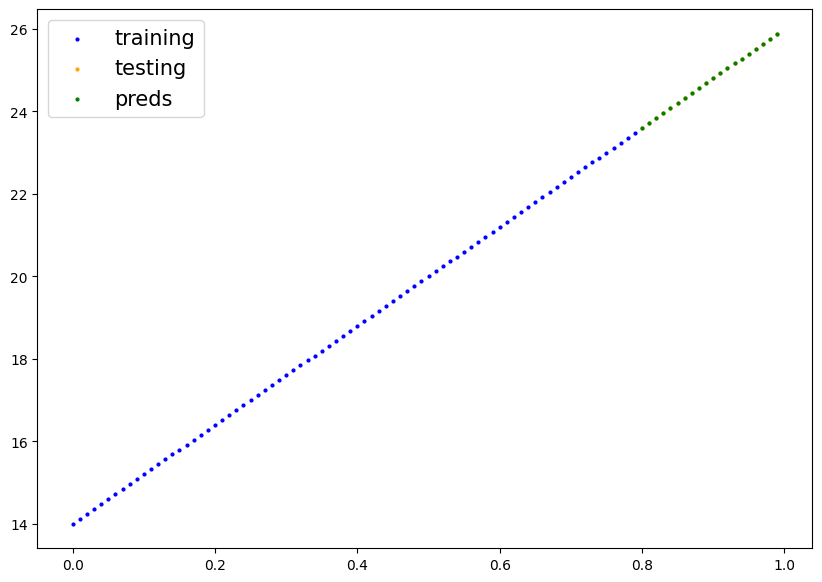

In [22]:
epochs = 3000
for epoch in range(epochs):
    # training
    model0.train()

    trainPreds = model0(xTrain)

    loss = lossFN(trainPreds, yTrain)

    optim.zero_grad()

    loss.backward()
    
    optim.step()

    # testing
    if epoch % 100 == 0:
        model0.eval()
        with torch.inference_mode():


            testPreds = model0(xTest)

            testLoss = lossFN(testPreds, yTest)

plotPoints(xTrain, yTrain, xTest, yTest, predictions=testPreds)

